In [7]:
import math
import numpy as np
import NSLib2 as l
import matplotlib.pyplot as plt


from scipy.linalg import solve
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [15]:
# QUESTION 1

x_0 = 0.1
solution = l.fixed_point(x_0)

print(f"The solution is: {solution:.4f}")


No. of iterations = 75
The solution is: 0.5671


In [14]:
# QUESTION 2

def func(x):
    return math.sqrt(1 + x**4)


# Set limits
a, b = 0, 1

# Apply Simpson's rule
n_simp = 2
integral_Simp = l.Simpsons(func, a, b, n_simp)

# Apply Gaussian quadrature (using degree 3 for higher precision)
d_gauss = 3
integral_gauss = l.gaussian_quadrature(func, a, b, d_gauss)

# Display the results
print(f"Simpson's Rule result: {integral_Simp:.6f}")
print(f"Gaussian Quadrature result: {integral_gauss:.6f}")



Simpson's Rule result: 1.089553
Gaussian Quadrature result: 1.089459


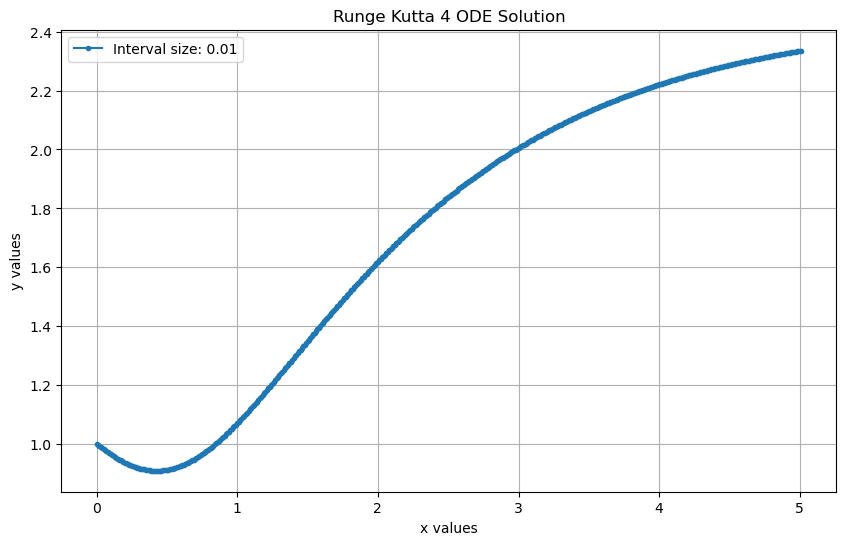

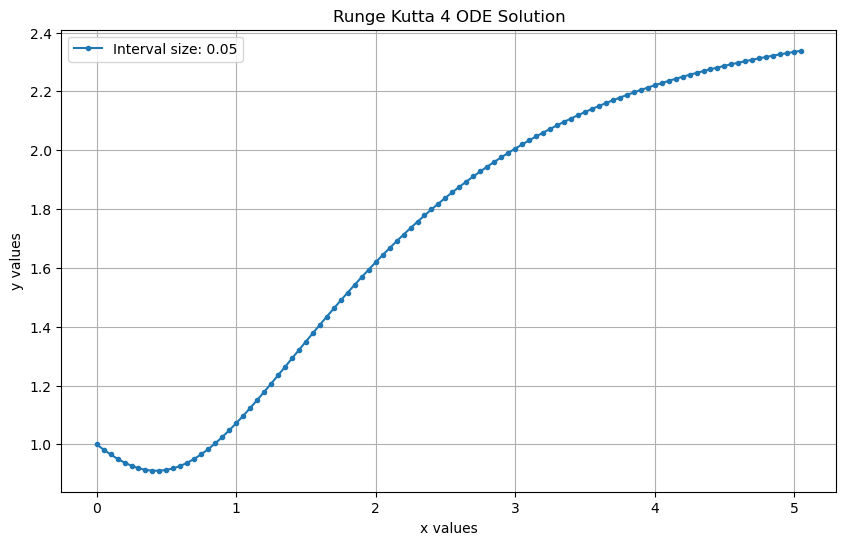

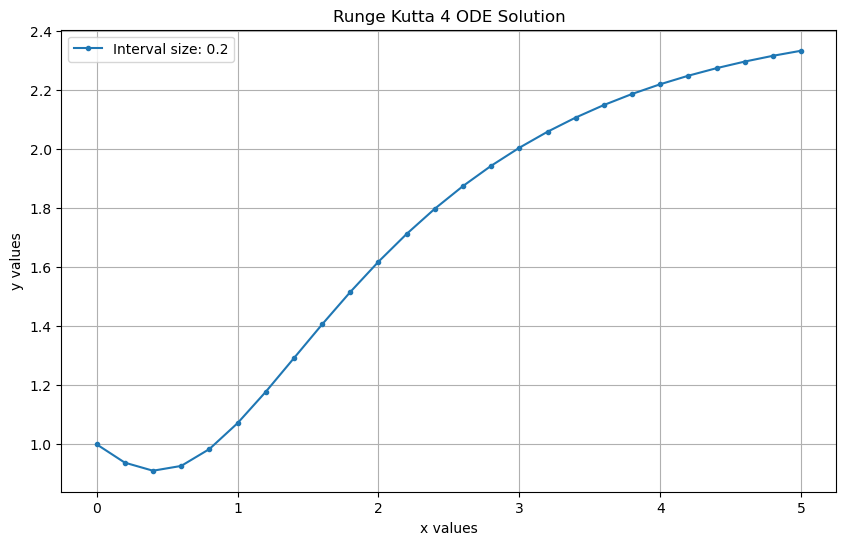

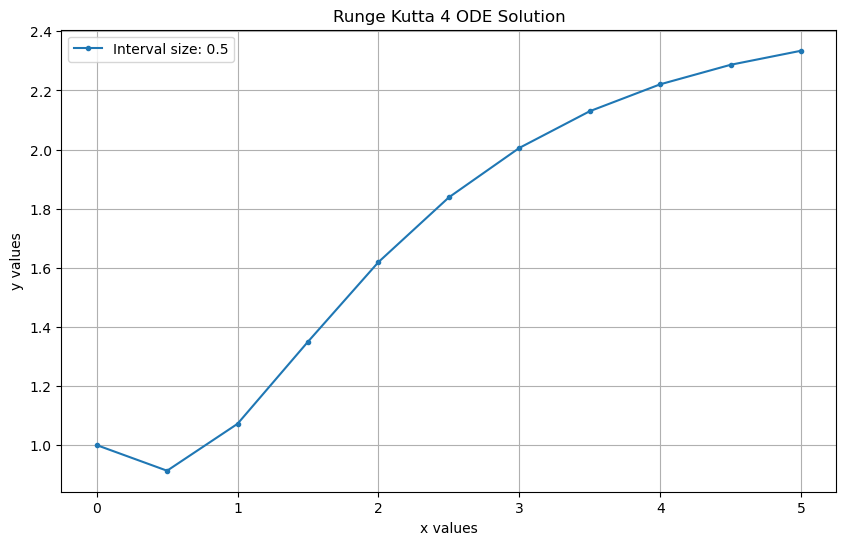

In [13]:
#QUESTION 3

def f(x, y):
    return (5 * x**2 - y) / np.exp(x + y)

# Initial conditions
x0 = 0
y0 = 1       # Given
xf = 5

# Tabulate results for different interval sizes
interval_sizes = [0.01, 0.05, 0.2, 0.5]

# Open a file for writing the results
with open('RK4_output_table.txt', 'w') as file:
    for h in interval_sizes:
        x_values, y_values = l.solve_rk4(f, x0, y0, h, xf)
        
        # Write header for each interval size
        file.write(f"\nInterval size: {h}\n")
        file.write("x\t y\n")
        
        # Write data to the file
        for x, y in zip(x_values, y_values):
            file.write(f"{x:.2f}\t {y:.6f}\n")
 
    for h in interval_sizes:
        x_values, y_values = l.solve_rk4(f, x0, y0, h, xf) 

        # Plot the solution
        fig, ax = plt.subplots(figsize=(10, 6))
        plt.plot(x_values, y_values, label=f'Interval size: {h}', marker='.')

        # Add labels and legend to the plot

        plt.xlabel('x values')
        plt.ylabel('y values')
        plt.title('Runge Kutta 4 ODE Solution')
        plt.legend()
        plt.grid(True)
        plt.show()  

#Tabulated results saved in output file 'RK4_output_table.txt'

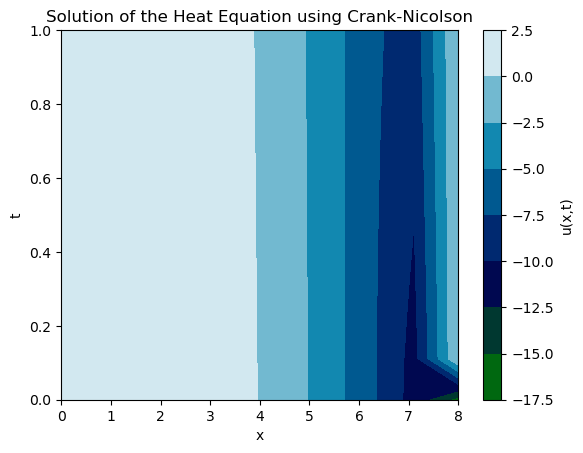

In [8]:
# QUESTION 4

def initial(x):
    return (4 * x - x**2) / 2
    

# Parameters
alpha = 0.01  # 
x_max = 8
t_max = 1
num_x = 10  # 
num_t = 10  # 

# Solve the heat equation using Crank-Nicolson
x_values, t_values, solution = l.crank_nicolson(initial, alpha, x_max, t_max, num_x, num_t)

# Save the solution in a table
with open('CrankN_output_table.txt', 'w') as file:
    file.write("x\tt\tu(x,t)\n")
    for i in range(num_x):
        for j in range(num_t):
            file.write(f"{x_values[i]:.2f}\t{t_values[j]:.2f}\t{solution[i, j]:.6f}\n")
            
            
# Display the solution in a contour plot
X, T = np.meshgrid(x_values, t_values)
plt.contourf(X, T, solution.T, cmap='ocean')
plt.colorbar(label='u(x,t)')
plt.title('Solution of the Heat Equation using Crank-Nicolson')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

#Tabulated results saved in output file 'CrankN_output_table.txt'

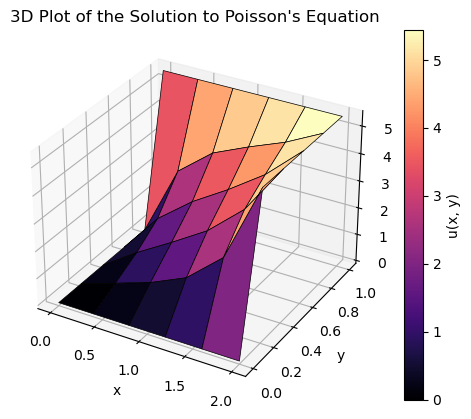

In [10]:
# QUESTION 5

# Grid parameters
nx = 6
ny = 6
dx = 2 / (nx - 1)
dy = 1 / (ny - 1)

x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny)

# Create 2D meshgrids
X, Y = np.meshgrid(x, y)

# Initialize grid and set boundary conditions
u = l.initialize_grid(nx, ny)
l.set_boundary_conditions(u, X, Y)

# Solve Poisson's equation
num_iterations = 10000
l.poisson_equation(u, X, Y, nx, ny, dx, dy, num_iterations)

# Save the solution in a table
filename ='Poisson_solution_table.txt'
l.save_solution_table(u, X, Y, nx, ny, filename)

# Plot the solution in 3D
l.plot_3d(x, y, u)

#Tabulated results saved in output file 'Poisson_output_table.txt'